In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
# load data-------
data=pd.read_csv("C:/Users/admin/ML_Project/BankNifty-Price-Prediction/Banknifty.csv",parse_dates=["Date"])

data.head()

,Date,Open,High,Low,Close
0,2021-12-31,35114.40,35596.95,35113.75,35481.7
1,2021-12-30,34977.65,35179.05,34751.25,35063.6
2,2021-12-29,35168.85,35378.30,34890.80,35045.4
3,2021-12-28,35308.30,35352.40,35037.90,35183.8
4,2021-12-27,34573.65,35143.70,34233.00,35057.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    991 non-null    datetime64[ns]
 1   Open    991 non-null    float64       
 2   High    991 non-null    float64       
 3   Low     991 non-null    float64       
 4   Close   991 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 38.8 KB


In [5]:
data.describe()

,Open,High,Low,Close
count,991.000000,991.000000,991.000000,991.000000
mean,28867.059586,29097.856155,28578.162159,28838.114581
std,4973.590452,4964.894449,4974.125949,4970.187879
min,16759.950000,17681.700000,16116.250000,16917.650000
25%,25584.000000,25740.700000,25424.675000,25603.550000
50%,28245.550000,28520.550000,28043.250000,28264.200000
75%,32082.650000,32187.000000,31770.650000,31998.300000
max,41234.550000,41829.600000,40829.150000,41238.300000


In [6]:
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [7]:
data.shape

(991, 5)

<AxesSubplot: >

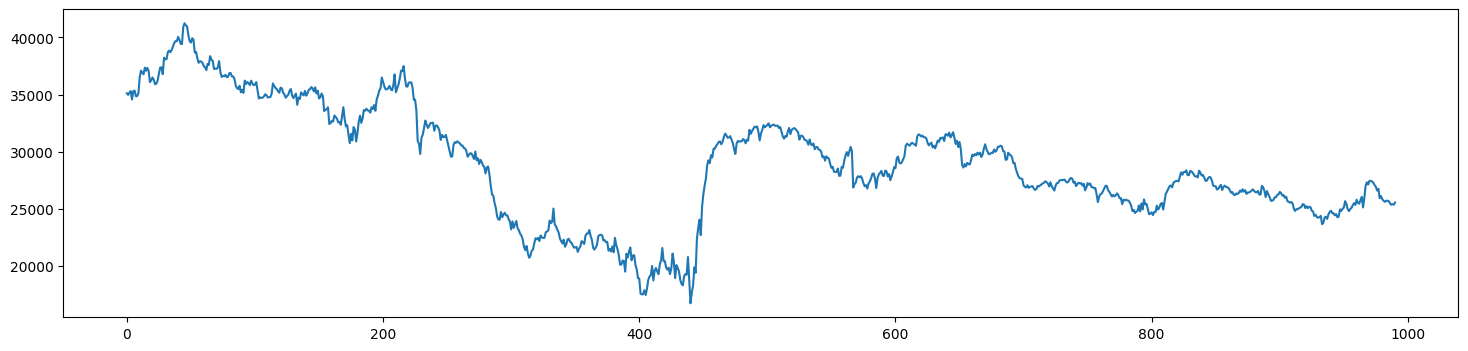

In [8]:
data['Open'].plot(figsize=(18,4))

In [9]:
X = data[['Open','High','Low']]
y = data['Close']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=0)

In [12]:
xtrain.shape

(743, 3)

In [13]:
xtest.shape

(248, 3)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
lr=LinearRegression()

In [15]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [16]:
print(lr.intercept_)

-38.76750943996012


In [17]:
print(lr.coef_)

[-0.64304246  0.87194391  0.77217935]


In [18]:
pred=lr.predict(xtest)

In [19]:
print(xtest)

         Open      High       Low
706  26960.05  26997.35  26847.80
720  26974.00  27243.80  26825.55
31   38113.40  38456.30  37981.20
337  22973.40  23180.30  22857.90
765  27009.30  27012.70  26764.90
..        ...       ...       ...
299  23902.90  24320.95  23754.85
661  29626.50  29757.40  29528.60
546  29604.35  29693.25  28994.20
453  28830.30  29134.30  28535.60
703  27078.10  27189.45  26719.40

[248 rows x 3 columns]


In [20]:
pred.shape

(248,)

In [21]:
dframe=pd.DataFrame(ytest,pred)

In [22]:
dfr=pd.DataFrame({"Actual Value" :ytest,"Predicted Value":pred})

In [23]:
print(dfr)

     Actual Value  Predicted Value
706      26867.55     26896.267129
720      27186.60     27085.006272
31       38041.55     38312.732683
337      23092.15     23050.680485
765      26862.95     26813.967958
..            ...              ...
299      24266.75     24140.161601
661      29618.45     29658.293735
546      29107.95     29203.949279
453      28815.35     28860.201801
703      26799.30     26888.708562

[248 rows x 2 columns]


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
lr.score(xtest,ytest)

0.999398065884849

In [26]:
import math

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae=mean_absolute_error(ytest,pred)
print("Mean_Absolute_Error :",mae)

mse=mean_squared_error(ytest,pred)
print("Mean_Squared_Error",mse)

msrt=math.sqrt(mean_squared_error(ytest,pred))
print("Mean_Sqrt_Error",msrt)

Mean_Absolute_Error : 89.64229653560595
Mean_Squared_Error 13138.321368139586
Mean_Sqrt_Error 114.62251684612228


In [28]:
graph=dfr.head(20)

<AxesSubplot: >

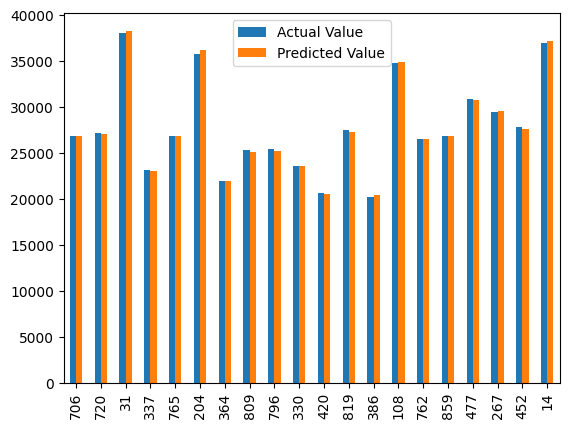

In [29]:
graph.plot(kind='bar')